In [9]:
import os
import sys
import time
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modules import binance_functions as bf, db_functions as dbf, general_functions as gf

In [29]:
#Buscando a tabela de dados

table_name = 'binance_klines_btcusdt_1m'

klines = dbf.read_table(table_name)

In [7]:
float(klines[0]['close'])

4261.48

In [20]:
float(klines[i]['taker_buy_quote_asset_volume'])

320.39085084

In [30]:

open_time = []; Open = []; High = []; Low = []; Close = []; Volume = []; Quote_asset_volume = []
Number_of_trades = []; Taker_buy_base_asset_volume = []; Taker_by_quote_asset_volume =[]


for i in range(0,len(klines)):
    
    open_time.append(int(datetime.timestamp(klines[i]['open_time'])))
    Open.append(float(klines[i]['open']))
    Close.append(float(klines[i]['close']))
    High.append(float(klines[i]['high']))
    Low.append(float(klines[i]['low']))
    Volume.append(float(klines[i]['volume']))
    Quote_asset_volume.append(float(klines[i]['quote_asset_volume']))
    Number_of_trades.append(int(klines[i]['number_of_trades']))
    Taker_buy_base_asset_volume.append(float(klines[i]['taker_buy_base_asset_volume']))
    Taker_by_quote_asset_volume.append(float(klines[i]['taker_buy_quote_asset_volume']))
    
kline = {'open_time': open_time,'open': Open, 'high': High, 'low': Low, 'close': Close, 'volume': Volume, 
     'quote_asset_volume': quote_asset_volume,'number_of_trades': Number_of_trades, 
     'taker_buy_base_asset_volume': taker_buy_base_asset_volume, 'taker_by_quote_asset_volume': taker_by_quote_asset_volume}

klines_pd = pd.DataFrame(data=kline, index=open_time)

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

#import pandas as pd
#from datetime import datetime

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

data = [go.Scatter(x=klines_pd['open_time'], y=klines_pd['close'])]

py.iplot(data, filename = 'time-series-simple')

/home/marcus/00-projetos/OpenBot/docker-cluster/venv/lib/python3.7/site-packages/chart_studio/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

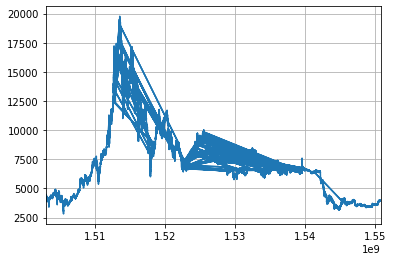

In [27]:
klines_pd['close'].plot(grid=True)
plt.show()

In [36]:
pair = 'BTCUSDT'
interval = '1d'
start_time = '1241893500000'
max_attempts = 10

klines, num_requests = bf.binance_klines_request_handler(pair, interval, start_time, max_attempts)